In [1]:
import sa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sa.load_partition_data()
sa.load_ionization_data()

/home/crobles/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


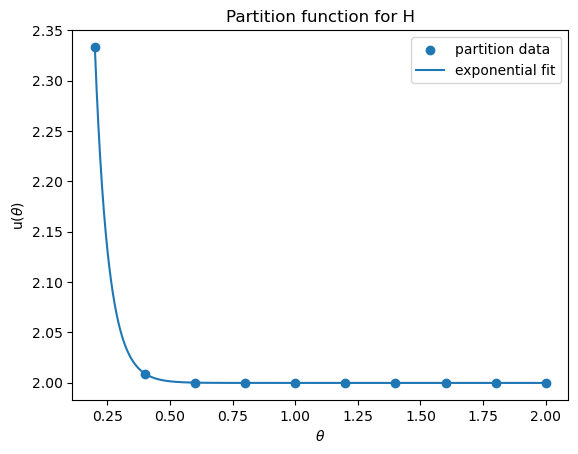

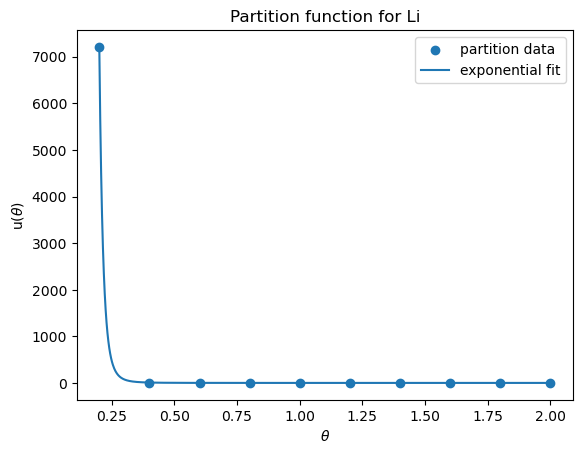

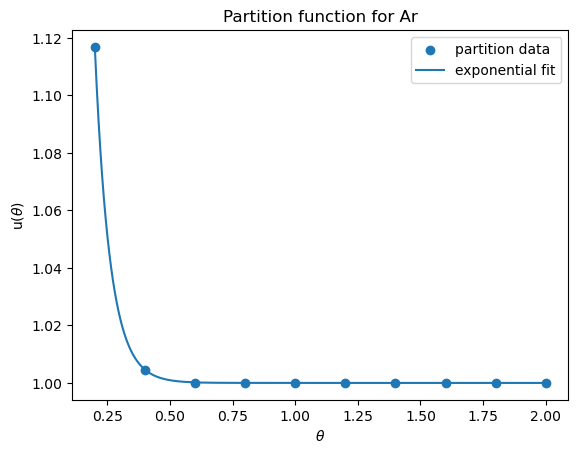

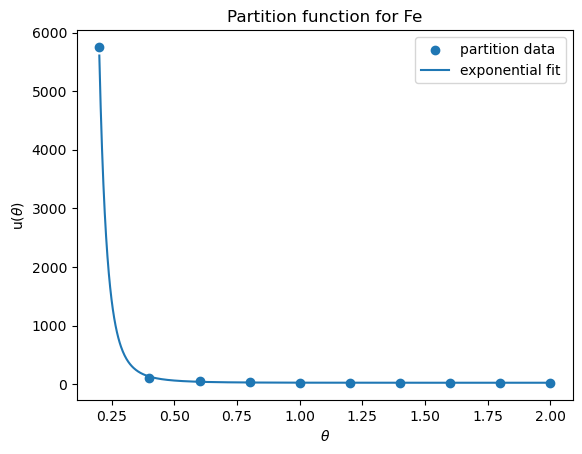

In [5]:
spec_list = ['H','Li','Ar','Fe']

for species in spec_list:
    
    test_theta = np.linspace(.2,2,num=1000)
    test_theta2 = np.linspace(.2,2,num=10)
    test_temp = sa.thetatotemp(test_theta)
    species_index=np.where(sa.partition_species == species)[0][0]
    u = sa.partition(test_temp,species)
    plt.scatter(test_theta2,np.power(10,sa.partition_data[species_index]))
    #plt.scatter(test_theta2,partition_data[species_index])
    plt.plot(test_theta,u)
    plt.title("Partition function for "+species)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"u($\theta$)")
    plt.legend(["partition data","exponential fit"])
    plt.savefig('hw6_partition_'+species+'.svg', bbox_inches='tight')
    #plt.yscale("log")
    plt.show()

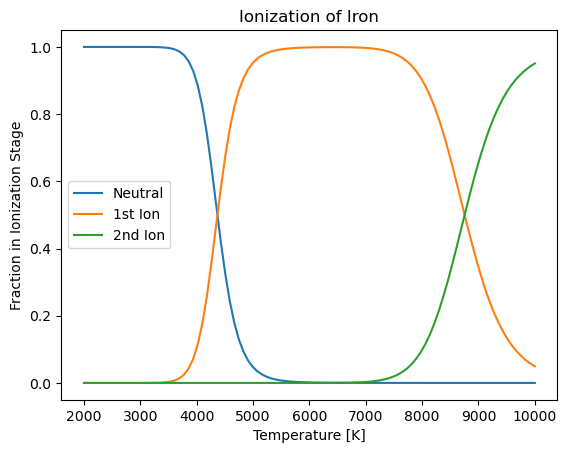

In [6]:
temp=np.linspace(2000,10000,num=100)

frac1 = sa.Phi(temp,'Fe')
frac2 = sa.Phi(temp,'Fe+')
ones = np.ones(temp.size)

zero = (ones/frac1)/((ones/frac1)+ones+frac2)
first = ones/((ones/frac1)+ones+frac2)
second = frac2/((ones/frac1)+ones+frac2)


plt.plot(temp,zero)
plt.plot(temp,first)
plt.plot(temp,second)
plt.title("Ionization of Iron")
plt.xlabel("Temperature [K]")
plt.ylabel("Fraction in Ionization Stage")
plt.legend(["Neutral","1st Ion","2nd Ion"])
plt.savefig('hw6_saha.svg', bbox_inches='tight')
plt.show()